In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
raw_data = pd.read_csv('./output.csv')

In [0]:
# level 0
level_0 = ['Group','BrainSeg', 'BrainSegNotVent', 'BrainSegNotVentSurf', 
				'VentricleChoroidVol',
				'lhCortex', 'rhCortex', 'Cortex', 
				'lhCerebralWhiteMatter','rhCerebralWhiteMatter', 'CerebralWhiteMatter', 
				'SubCortGray', 'TotalGray', 
				'SupraTentorial', 'SupraTentorialNotVent', 'SupraTentorialNotVentVox',
				'Mask',	'BrainSegVol-to-eTIV', 'MaskVol-to-eTIV',
				'lhSurfaceHoles', 'rhSurfaceHoles', 'SurfaceHoles',
				'EstimatedTotalIntraCranialVol', 
				'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle',
		        'Left-Inf-Lat-Vent', 'Right-Inf-Lat-Vent',
				'Left-Cerebellum-White-Matter', 'Right-Cerebellum-White-Matter',
		        'Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex',
				'Left-Thalamus-Proper', 'Right-Thalamus-Proper',
				'Left-Caudate', 'Right-Caudate',
		        'Left-Putamen', 'Right-Putamen',
				'Left-Pallidum', 'Right-Pallidum',
				'3rd-Ventricle', '4th-Ventricle', '5th-Ventricle',
				'Brain-Stem',
				'Left-Hippocampus', 'Right-Hippocampus',
				'Left-Amygdala', 'Right-Amygdala',
				'CSF',
				'Left-Accumbens-area', 'Right-Accumbens-area',
				'Left-VentralDC', 'Right-VentralDC',
				'Left-vessel', 'Right-vessel',
				'Left-choroid-plexus', 'Right-choroid-plexus',
				'WM-hypointensities', 'non-WM-hypointensities',
				'Optic-Chiasm',
				'CC_Posterior', 'CC_Mid_Posterior', 
				'CC_Central',
				'CC_Mid_Anterior', 'CC_Anterior']
# level 1
level_1 = ['Group', 'BrainSegNotVent', 'BrainSegNotVentSurf',
				'VentricleChoroidVol',
		        'lhCortex', 'rhCortex', 'Cortex',
				'lhCerebralWhiteMatter', 'rhCerebralWhiteMatter', 'CerebralWhiteMatter',
				'SubCortGray', 'TotalGray', 
				'BrainSegVol-to-eTIV',
		        'lhSurfaceHoles',
		        'EstimatedTotalIntraCranialVol', 
				'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle',
		        'Left-Inf-Lat-Vent', 'Right-Inf-Lat-Vent',
		        'Left-Putamen', 'Right-Putamen',
				'3rd-Ventricle',
				'Left-Hippocampus', 'Right-Hippocampus',
				'Left-Amygdala', 'Right-Amygdala',
		        'Left-Accumbens-area', 'Right-Accumbens-area',
		        'WM-hypointensities', 
		        'Optic-Chiasm']
# level 2
level_2 = ['Group', 'VentricleChoroidVol',
				'lhCortex', 'rhCortex', 'Cortex',
				'SubCortGray', 'TotalGray',
				'BrainSegVol-to-eTIV',
				'lhSurfaceHoles', 
				'Left-Lateral-Ventricle', 'Right-Lateral-Ventricle',
				'Left-Inf-Lat-Vent', 'Right-Inf-Lat-Vent',
				'Left-Putamen', 'Right-Putamen',
				'3rd-Ventricle',
				'Left-Hippocampus', 'Right-Hippocampus',
				'Left-Amygdala', 'Right-Amygdala',
				'Left-Accumbens-area', 'Right-Accumbens-area',
				'WM-hypointensities']

roi_data = raw_data[level_0]

In [51]:
roi_data['Group'] = roi_data['Group'].replace('CN', 0)
roi_data['Group'] = roi_data['Group'].replace('MCI', 1)
roi_data['Group'] = roi_data['Group'].replace('AD', 2)

roi_data = roi_data.assign(Group=lambda s: s['Group'].astype('int'))
roi_data = roi_data.mask(roi_data['Group'] < 0).dropna()
# roi_data.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [52]:
features = roi_data.mask(roi_data.eq("None")).dropna().astype('float')
features_x = features[list(filter(lambda x: x != "Group", list(features.columns)))].values
features_y = features['Group'].values

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# SVM with 10*10 Fold Validation
## Non-linear SVM

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

n_fold = 10
rkf = RepeatedKFold(n_splits=n_fold, n_repeats=n_fold)
total_acc = 0.

for idx, (train_idx, test_idx) in enumerate(rkf.split(features_x)):
    train_x, test_x = features_x[train_idx], features_x[test_idx]
    train_y, test_y = features_y[train_idx], features_y[test_idx]

    scaler = preprocessing.StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    svc = base_estimator = SVC(kernel='rbf').fit(train_x, train_y)
    result_svc = svc.predict(test_x)
    acc_svc = accuracy_score(test_y, result_svc)
    
    total_acc += acc_svc
    print("%f" % (acc_svc))
    
total_acc /= (n_fold*n_fold)
print("Total Acc: %f" % total_acc)

0.791111
0.702222
0.791111
0.782222
0.733333
0.768889
0.795556
0.760000
0.795556
0.737778
0.733333
0.733333
0.755556
0.800000
0.697778
0.773333
0.795556
0.777778
0.746667
0.782222
0.773333
0.782222
0.760000
0.751111
0.737778
0.768889
0.751111
0.764444
0.804444
0.746667
0.773333
0.751111
0.800000
0.791111
0.764444
0.733333
0.742222
0.715556
0.777778
0.786667
0.742222
0.760000
0.746667
0.777778
0.826667
0.791111
0.746667
0.742222
0.786667
0.760000
0.751111
0.711111
0.786667
0.760000
0.782222
0.804444
0.795556
0.737778
0.804444
0.746667
0.791111
0.720000
0.720000
0.720000
0.777778
0.742222
0.751111
0.795556
0.768889
0.786667
0.742222
0.751111
0.746667
0.831111
0.733333
0.795556
0.733333
0.791111
0.724444
0.768889
0.737778
0.760000
0.791111
0.751111
0.728889
0.742222
0.791111
0.773333
0.755556
0.808889
0.782222
0.746667
0.742222
0.786667
0.755556
0.764444
0.831111
0.773333
0.751111
0.728889
Total Acc: 0.763822


## Linear SVM

In [0]:
n_fold = 10
rkf = RepeatedKFold(n_splits=n_fold, n_repeats=n_fold)
total_acc = 0.

for idx, (train_idx, test_idx) in enumerate(rkf.split(features_x)):
    train_x, test_x = features_x[train_idx], features_x[test_idx]
    train_y, test_y = features_y[train_idx], features_y[test_idx]

    scaler = preprocessing.StandardScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    svc = base_estimator = SVC(kernel='linear').fit(train_x, train_y)
    result_svc = svc.predict(test_x)
    acc_svc = accuracy_score(test_y, result_svc)
    
    total_acc += acc_svc
    print("%f" % (acc_svc))
    
total_acc /= (n_fold*n_fold)
print("Total Acc: %f" % total_acc)

0.568889
0.555556
0.595556
0.600000
0.617778
0.626667
0.648889
0.666667
0.626667
0.595556
0.626667
0.564444
0.644444
0.626667
0.635556
0.657778
0.586667
0.564444
0.613333
0.608889
0.600000
0.613333
0.577778
0.684444
0.595556
0.631111
0.582222
0.573333
0.577778
0.653333
0.648889
0.657778
0.591111
0.560000
0.586667
0.622222
0.600000
0.568889
0.657778
0.577778
0.613333
0.564444
0.626667
0.582222
0.635556
0.631111
0.560000
0.631111
0.648889
0.626667
0.604444
0.577778
0.662222
0.626667
0.591111
0.662222
0.591111
0.617778
0.560000
0.626667
0.604444
0.564444
0.644444
0.608889
0.644444
0.577778
0.617778
0.568889
0.595556
0.640000
0.577778
0.608889
0.640000
0.613333
0.617778
0.626667
0.600000
0.631111
0.600000
0.582222
0.595556
0.653333
0.591111
0.600000
0.600000
0.591111
0.604444
0.631111
0.622222
0.604444
0.631111
0.573333
0.635556
0.608889
0.582222
0.577778
0.604444
0.640000
0.626667
0.604444
Total Acc: 0.609733


# RF with 10*10 Fold Validation

## Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

n_fold = 10
rkf = RepeatedKFold(n_splits=n_fold, n_repeats=n_fold)
total_acc = 0.

for idx, (train_idx, test_idx) in enumerate(rkf.split(features_x)):
    train_x, test_x = features_x[train_idx], features_x[test_idx]
    train_y, test_y = features_y[train_idx], features_y[test_idx]
    
    rfr = RandomForestRegressor(n_estimators=100).fit(train_x, train_y)
    result_rf = [find_nearest([0, 1, 2], value) for value in rfr.predict(test_x)]
    acc_rf = accuracy_score(test_y, result_rf)
    
    total_acc += acc_rf
    print("%f" % (acc_rf))
    
total_acc /= (n_fold*n_fold)
print("Total Acc: %f" % total_acc)

0.791111
0.862222
0.871111
0.831111
0.777778
0.760000
0.804444
0.808889
0.831111
0.853333
0.782222
0.813333
0.826667
0.782222
0.826667
0.786667
0.804444
0.800000
0.835556
0.831111
0.822222
0.826667
0.835556
0.840000
0.822222
0.791111
0.840000
0.822222
0.795556
0.831111
0.826667
0.777778
0.822222
0.848889
0.826667
0.777778
0.831111
0.835556
0.831111
0.831111
0.831111
0.813333
0.817778
0.760000
0.813333
0.777778
0.813333
0.862222
0.831111
0.804444
0.804444
0.840000
0.848889
0.808889
0.831111
0.800000
0.817778
0.800000
0.786667
0.795556
0.826667
0.800000
0.831111
0.817778
0.817778
0.813333
0.808889
0.835556
0.826667
0.795556
0.844444
0.813333
0.804444
0.866667
0.795556
0.764444
0.795556
0.800000
0.813333
0.822222
0.746667
0.848889
0.808889
0.822222
0.786667
0.808889
0.795556
0.822222
0.840000
0.777778
0.826667
0.831111
0.800000
0.826667
0.755556
0.791111
0.808889
0.826667
0.840000
0.760000
Total Acc: 0.813911


## Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

n_fold = 10
rkf = RepeatedKFold(n_splits=n_fold, n_repeats=n_fold)
total_acc = 0.

for idx, (train_idx, test_idx) in enumerate(rkf.split(features_x)):
    train_x, test_x = features_x[train_idx], features_x[test_idx]
    train_y, test_y = features_y[train_idx], features_y[test_idx]
    
    rfr = RandomForestClassifier(n_estimators=100).fit(train_x, train_y)
    result_rf = [find_nearest([0, 1, 2], value) for value in rfr.predict(test_x)]
    acc_rf = accuracy_score(test_y, result_rf)
    
    total_acc += acc_rf
    print("%f" % (acc_rf))
    
total_acc /= (n_fold*n_fold)
print("Total Acc: %f" % total_acc)

0.924444
0.888889
0.920000
0.875556
0.888889
0.884444
0.906667
0.888889
0.906667
0.915556
0.880000
0.897778
0.888889
0.928889
0.920000
0.884444
0.924444
0.848889
0.911111
0.884444
0.888889
0.880000
0.893333
0.884444
0.902222
0.897778
0.871111
0.862222
0.915556
0.915556
0.875556
0.862222
0.884444
0.924444
0.893333
0.920000
0.911111
0.897778
0.933333
0.884444
0.897778
0.928889
0.880000
0.875556
0.915556
0.906667
0.893333
0.880000
0.888889
0.937778
0.857778
0.906667
0.893333
0.880000
0.915556
0.848889
0.915556
0.933333
0.875556
0.880000
0.902222
0.884444
0.884444
0.897778
0.893333
0.902222
0.928889
0.897778
0.875556
0.866667
0.875556
0.924444
0.911111
0.866667
0.893333
0.884444
0.888889
0.893333
0.906667
0.880000
0.902222
0.897778
0.853333
0.884444
0.893333
0.866667
0.902222
0.880000
0.915556
0.906667
0.848889
0.906667
0.893333
0.875556
0.862222
0.906667
0.866667
0.893333
0.933333
0.888889
Total Acc: 0.894133


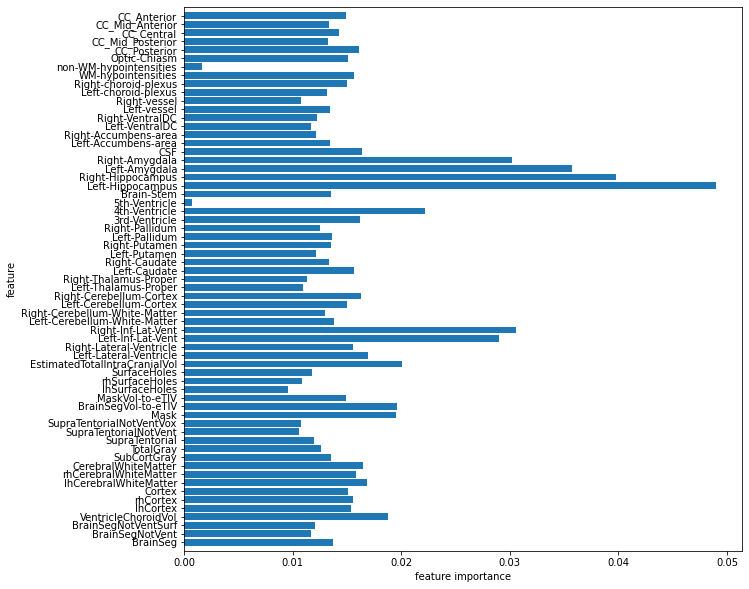

In [54]:
n_feature = 63
index = np.arange(n_feature)

plt.barh(index, rfr.feature_importances_, align='center')

plt.yticks(index,level_0[1:])
plt.ylim(-1, n_feature)
plt.xlabel('feature importance')
plt.ylabel('feature')
# plt.figure(figsize=(14, 5))
plt.show()

In [0]:
from sklearn.tree import export_graphviz

estimator = rfr.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = level_0[1:],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [0]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')


Output hidden; open in https://colab.research.google.com to view.